In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend as K

#### Patrones de aprendizaje

In [2]:
ntrain = 4 #Cantidad de patrones para entrenar
x_train = np.zeros((ntrain, 3), dtype = np.float32) #Entradas
y_train = np.zeros((ntrain, 1), dtype = np.float32) #Salidas

x_train[0][0] = 1
x_train[0][1] = 1
y_train[0] = 1

x_train[1][0] = 1
x_train[1][1] = -1
y_train[1] = -1

x_train[2][0] = -1
x_train[2][1] = 1
y_train[2] = -1

x_train[3][0] = -1
x_train[3][1] = -1
y_train[3] = 1

#Neurona de bias en la capa de entrada
for i in range(ntrain):
    x_train[i][2] = -1

Funciones

In [3]:
def MSE(y_esp, y_obt):
    '''
    Recibe el vector de patrones de salidas esperadas y obtenidas (escalares) y calcula el error cuadrático
    '''
    e = 0
    for i in range(len(y_esp)):
        for j in range(len(y_esp[0])):
            e += (y_esp[i][j] - y_obt[i][j])**2
    
    e = 0.5*e

    return e

def g(x):
    return np.tanh(x)

def g_pr(x):
    y = 1 - np.tanh(x)**2
    return y

def v1_accuracy(y_true, y_pred):
    return np.mean(K.mean(K.equal(y_true, K.round(y_pred)), axis=-1))

### Variables para el loop de aprendizaje

In [4]:
r = 100 #Cantidad de realizaciones
lr = 0.5 #learning rate
epocas = 1000

#Vectores para luego analizar el entrenamiento
accuracy = np.zeros(shape=(epocas, r)) #Accuracy de la neurona
mse = np.zeros(shape=(epocas, r))

### Loop de aprendizaje (Retropropagación de errores)

In [5]:
for i in range(r):
    print("Realizacion " + str(i+1))
    
    #En cada realización, inicializo aleatoriamente los parámetros de la red
    w1 = np.random.normal(loc=0, scale=1, size=(3,)) #Capa 1 afectada por capa 0
    w2 = np.random.normal(loc=0, scale=1, size=(4,)) #Capa 2 afectada por capa 1

    #Módulos de las correcciones
    deltas1 = np.zeros(epocas) #Módulo del vector deltaW1
    deltas2 = np.zeros(epocas)  #Módulo del vector deltaW2

    #Salida de la red para cada época
    salidas = np.zeros((ntrain, 1), dtype = np.float32) #Salidas #Registro las salidas predichas y calculo accuracy

    for k in range(epocas):
        deltaW1 = np.zeros(shape=(3,))
        deltaW2 = np.zeros(shape=(4,))

        for mu in range(ntrain):

        #FORWARD PROPAGATION (entrada)
            #Capa de entrada
            c0 = x_train[mu]

            #Capa oculta
            h1 = np.dot(c0,w1)
            c1 = g(h1)           

            #Capa de salida
            h2 = np.dot(np.concatenate([c0, np.array([c1])]), w2)
            c2 = g(h2) #output
            salidas[mu] = c2

        #BACK PROPAGATION (delta)    
            delta2 = (y_train[mu] - c2)*g_pr(h2)

            delta1 = delta2*w2[3]*g_pr(h1)

        #FORWARD PROPAGATION (correccion)
            deltaW1 += lr * c0 * delta1 #doy vuelta c0 para obtener el producto vectorial

            deltaW2 += lr * np.concatenate([c0, [c1]]) * delta2

        w1 += deltaW1
        w2 += deltaW2

        deltas1[k] = np.linalg.norm(deltaW1)
        deltas2[k] = np.linalg.norm(deltaW2)
        mse[k, i] = MSE(y_train, salidas)
        accuracy[k, i] = v1_accuracy(y_train, salidas)

    print("Matrices de pesos finales")
    print(w1)
    print(w2)
    print("MSE final")
    print(mse[-1, i])
            

Realizacion 1
Matrices de pesos finales
[ 2.26094095 -2.2528421  -2.26263822]
[-2.28488897  2.28309929  2.28527287  4.68289717]
MSE final
0.0009322009199834724
Realizacion 2
Matrices de pesos finales
[2.16934357 2.16933258 2.16879195]
[-2.29688361 -2.29688058 -2.29673237  4.71779758]
MSE final
0.0009244076062806528
Realizacion 3
Matrices de pesos finales
[-0.77408703 -1.01622544 -0.75386028]
[ 1.69745824  1.4320363   1.7127095  -1.58600097]
MSE final
2.000124217570322
Realizacion 4
Matrices de pesos finales
[-1.04145387  0.46122999 -0.03802972]
[-1.95423559  2.41429757 -2.68921495  1.03913553]
MSE final
2.000136187236315
Realizacion 5
Matrices de pesos finales
[ 0.75775945  0.29461236 -0.56670862]
[-1.96858786 -2.31445606  2.14338267 -0.97842335]
MSE final
2.0001982525345294
Realizacion 6
Matrices de pesos finales
[ 0.70147846 -0.77186963 -0.99693823]
[-2.49726706  2.51993414 -1.94305992  0.67369381]
MSE final
2.0003366714465365
Realizacion 7
Matrices de pesos finales
[1.30278783 0.701

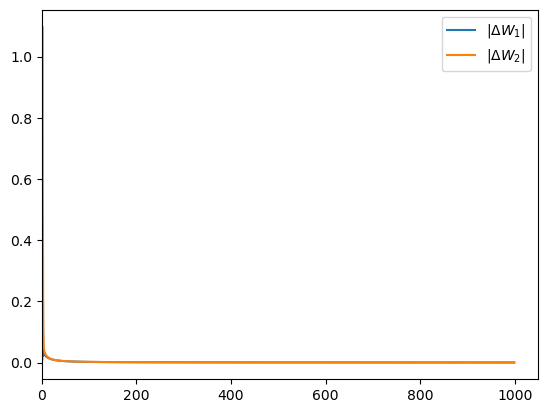

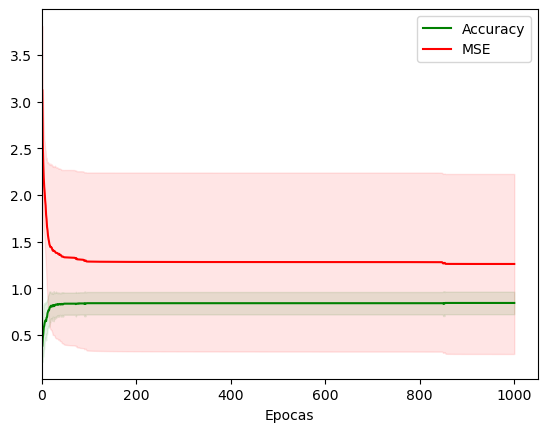

In [6]:
plt.figure()
plt.plot(deltas1, label = "|$\Delta W_1$|")
plt.plot(deltas2, label = "|$\Delta W_2$|")
plt.legend()
plt.xlim(0)
plt.show()

acc_mean = np.mean(accuracy, axis = 1)
acc_std = np.std(accuracy, axis=1)
mse_mean = np.mean(mse, axis = 1)
mse_std = np.std(mse, axis=1)

plt.figure()
plt.fill_between(range(1, epocas + 1), acc_mean - acc_std, acc_mean + acc_std, color='g', alpha=0.1)
plt.fill_between(range(1, epocas + 1), mse_mean - mse_std, mse_mean + mse_std, color='r', alpha=0.1)
plt.plot(range(1, epocas + 1), acc_mean, color='g', label='Accuracy')
plt.plot(range(1, epocas + 1), mse_mean, color='r', label='MSE')
plt.xlabel("Epocas")
plt.legend()
plt.xlim(0)
plt.show()